# Process
In this notebook, I will analyse the results of the recommendation on the properties.

# A. Import Libraries

In [1]:
import warnings
import pickle as pkl
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import numpy as np
pd.set_option("display.precision", 6)
from cornac.metrics import MAE, MSE, RMSE, Precision, Recall, NDCG, AUC, MAP, FMeasure, MRR
from collections import defaultdict
from scipy import stats
import seaborn as sns
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.


# B. Set Hyperparameters

In [8]:
item_threshold = 5 # remove users with less than item_threshold items
user_threshold = 5 # remove items with less than user_threshold users
top_threshold = 200 # remove users who have rated more than top_threshold items
recommendation_type = "books" # books, music or movies
item_col = "book" # the item column
my_seed = 0 # random_seed
top_fraction_items = 0.2 # the limit for an item to be considered popular
top_fraction_users = 0.2# the limit for a user to be considered High Mainstriminess
split_gender_by = "male_female_difference" 
split_country_by = "ratio_USA"
split_by = "pop_fraq"

rd.seed(my_seed)
np.random.seed(my_seed)

These additions will be useful so we can load and save the different files (plots and processed data) with clarity on the hyperparameters.

In [12]:
addition_1 = "_u"+str(item_threshold)+"_i"+str(user_threshold)+"_t"+str(top_threshold)
addition_2 = addition_1 + "_tfi"+str(int(100*top_fraction_items))
addition_3 = addition_2 + "_tfu"+str(int(100*top_fraction_users))
addition_4 = addition_3 + ("_sbpf" if (split_by=="pop_fraq") else "_sbpif")

addition_gender = addition_1 + "_tfu"+str(int(100*top_fraction_users)) + "_mfd"
addition_country = addition_1 + "_tfu"+str(int(100*top_fraction_users)) + "_USAr"

# C. Read Files
Files to read:
1. exp_results & exp_metrics: the Cornac results & metrics
2. training_ids: the user training ids
3. male, female and diverse oriented users
4. low, mid and USA oriented users

In [13]:
raw_file_location = "data/raw/" # here are stored the raw data files
processed_file_location = "data/processed/" # here we store the processed data files

### C1. General results

In [14]:
# Cornac results
with open(processed_file_location+recommendation_type+"/experiment_results_cornac"+addition_4+".pkl", "rb") as f:
    exp_results = pkl.load(f)
with open(processed_file_location+recommendation_type+"/experiment_metrics_cornac"+addition_4+".pkl", "rb") as f:
    exp_metrics = pkl.load(f)

In [16]:
with open(processed_file_location+recommendation_type+"/training_user_ids"+addition_4+".pkl", "rb") as f:
    training_ids = pkl.load(f)

### C2. Gender analysis

In [15]:
with open(processed_file_location+recommendation_type+"/new_male_oriented.csv", "rb") as f:
    male_oriented_users = pd.read_csv(f, index_col=0)
with open(processed_file_location+recommendation_type+"/new_female_oriented.csv", "rb") as f:
    female_oriented_users =  pd.read_csv(f, index_col=0)
with open(processed_file_location+recommendation_type+"/new_diverse.csv", "rb") as f:
    diverse_users =  pd.read_csv(f,  index_col=0)

### C3. Country analysis

In [18]:
with open(processed_file_location+recommendation_type+"/new_USA_oriented.csv", "rb") as f:
    USA_oriented_users = pd.read_csv(f, index_col=0)
with open(processed_file_location+recommendation_type+"/new_midUSA_oriented.csv", "rb") as f:
    midUSA_oriented_users =  pd.read_csv(f, index_col=0)
with open(processed_file_location+recommendation_type+"/new_lowUSA_oriented.csv", "rb") as f:
    lowUSA_oriented_users =  pd.read_csv(f,  index_col=0)

## D. Analyze Results

In [19]:
algo_names = ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']

## D.1 Gender

### D.1.1 Total results

In [22]:
full_dataset_gender = pd.concat([female_oriented_users, male_oriented_users, diverse_users])

In [23]:
old_avg_gender = full_dataset_gender.male_female_difference.mean()
new_avg_gender = []

for alg in algo_names:
    new_avg_gender.append(full_dataset_gender["new_male_female_difference_"+alg].mean())

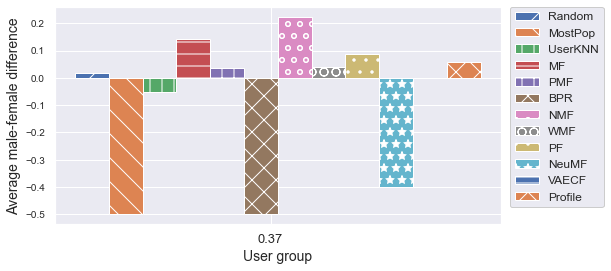

In [31]:
sns.set(rc = {'figure.figsize':(8,4)})

# set width of bar
barWidth = 0.07

# set height of bar
bars1 = [new_avg_gender[0]]
bars2 = [new_avg_gender[1]]
bars3 = [new_avg_gender[2]]
bars4 = [new_avg_gender[3]]
bars5 = [new_avg_gender[4]]
bars6 = [new_avg_gender[5]]
bars7 = [new_avg_gender[6]]
bars8 = [new_avg_gender[7]]
bars9 = [new_avg_gender[8]]
bars10 = [new_avg_gender[9]]
bars11 = [new_avg_gender[10]]
bars12 = old_avg_gender

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]
r12 = [x + barWidth for x in r11]

# ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "--", "\/"]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Random', hatch=patterns[0])
plt.bar(r2, bars2, width=barWidth, label='MostPop', hatch=patterns[1])
plt.bar(r3, bars3, width=barWidth, label='UserKNN', hatch=patterns[2])
plt.bar(r4, bars4, width=barWidth, label='MF', hatch=patterns[3])
plt.bar(r5, bars5, width=barWidth, label='PMF', hatch=patterns[4])
plt.bar(r6, bars6, width=barWidth, label='BPR', hatch=patterns[5])
plt.bar(r7, bars7, width=barWidth, label='NMF', hatch=patterns[6])
plt.bar(r8, bars8, width=barWidth, label='WMF', hatch=patterns[7])
plt.bar(r9, bars9, width=barWidth, label='PF', hatch=patterns[8])
plt.bar(r10, bars10, width=barWidth, label='NeuMF', hatch=patterns[9])
plt.bar(r11, bars11, width=barWidth, label='VAECF', hatch=patterns[10])
plt.bar(r12, bars12, width=barWidth, label='Profile', hatch=patterns[11])

# Add xticks on the middle of the group bars + show legend
plt.xlabel('User group', fontsize='14')
plt.ylabel('Average male-female difference', fontsize='14')
plt.xticks([r + barWidth + 0.3 for r in range(len(bars1))], fontsize='13')
plt.yticks(fontsize='10')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., framealpha=1, fontsize='12')
plt.show()
#plt.savefig('gap_analysis.pdf', dpi=300, bbox_inches='tight')

### D.1.2 Results per user group

In [59]:
old_avg_male_oriented = male_oriented_users.male_female_difference.mean()
old_avg_female_oriented = female_oriented_users.male_female_difference.mean()
old_avg_diverse = diverse_users.male_female_difference.mean()

new_avg_male_oriented = []
new_avg_female_oriented = []
new_avg_diverse = []
for alg in algo_names:
    male_oriented_users["new_male_female_difference_"+alg] = (male_oriented_users["new_male_female_difference_"+alg] - male_oriented_users.male_female_difference)/male_oriented_users.male_female_difference.abs()
    diverse_users["new_male_female_difference_"+alg] = (diverse_users["new_male_female_difference_"+alg] - diverse_users.male_female_difference)/diverse_users.male_female_difference.abs()                       
    female_oriented_users["new_male_female_difference_"+alg] = (female_oriented_users["new_male_female_difference_"+alg] - female_oriented_users.male_female_difference)/female_oriented_users.male_female_difference.abs()    
    
    new_avg_male_oriented.append(male_oriented_users["new_male_female_difference_"+alg].mean())
    new_avg_female_oriented.append(female_oriented_users["new_male_female_difference_"+alg].mean())
    new_avg_diverse.append(diverse_users["new_male_female_difference_"+alg].mean())

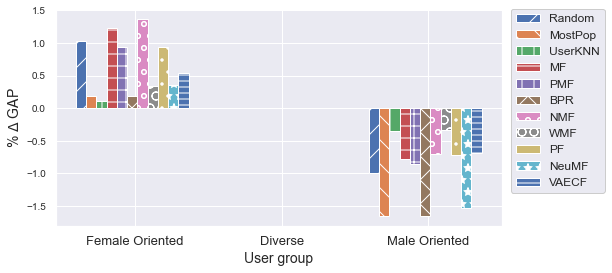

In [60]:
sns.set(rc = {'figure.figsize':(8,4)})

# set width of bar
barWidth = 0.07

# set height of bar
bars1 = [new_avg_female_oriented[0], new_avg_diverse[0], new_avg_male_oriented[0]]
bars2 = [new_avg_female_oriented[1], new_avg_diverse[1], new_avg_male_oriented[1]]
bars3 = [new_avg_female_oriented[2], new_avg_diverse[2], new_avg_male_oriented[2]]
bars4 = [new_avg_female_oriented[3], new_avg_diverse[3], new_avg_male_oriented[3]]
bars5 = [new_avg_female_oriented[4], new_avg_diverse[4], new_avg_male_oriented[4]]
bars6 = [new_avg_female_oriented[5], new_avg_diverse[5], new_avg_male_oriented[5]]
bars7 = [new_avg_female_oriented[6], new_avg_diverse[6], new_avg_male_oriented[6]]
bars8 = [new_avg_female_oriented[7], new_avg_diverse[7], new_avg_male_oriented[7]]
bars9 = [new_avg_female_oriented[8], new_avg_diverse[8], new_avg_male_oriented[8]]
bars10 = [new_avg_female_oriented[9], new_avg_diverse[9], new_avg_male_oriented[9]]
bars11 = [new_avg_female_oriented[10], new_avg_diverse[10], new_avg_male_oriented[10]]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]
# r12 = [x + barWidth for x in r11]
# r13 = [x + barWidth for x in r12]

# ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "--"]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Random', hatch=patterns[0])
plt.bar(r2, bars2, width=barWidth, label='MostPop', hatch=patterns[1])
plt.bar(r3, bars3, width=barWidth, label='UserKNN', hatch=patterns[2])
plt.bar(r4, bars4, width=barWidth, label='MF', hatch=patterns[3])
plt.bar(r5, bars5, width=barWidth, label='PMF', hatch=patterns[4])
plt.bar(r6, bars6, width=barWidth, label='BPR', hatch=patterns[5])
plt.bar(r7, bars7, width=barWidth, label='NMF', hatch=patterns[6])
plt.bar(r8, bars8, width=barWidth, label='WMF', hatch=patterns[7])
plt.bar(r9, bars9, width=barWidth, label='PF', hatch=patterns[8])
plt.bar(r10, bars10, width=barWidth, label='NeuMF', hatch=patterns[9])
plt.bar(r11, bars11, width=barWidth, label='VAECF', hatch=patterns[10])

# Add xticks on the middle of the group bars + show legend
plt.xlabel('User group', fontsize='14')
plt.ylabel('% $\Delta$ GAP', fontsize='14')
plt.xticks([r + barWidth + 0.3 for r in range(len(bars1))], ['Female Oriented', 'Diverse', 'Male Oriented'], fontsize='13')
plt.yticks(fontsize='10')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., framealpha=1, fontsize='12')
plt.show()
#plt.savefig('gap_analysis.pdf', dpi=300, bbox_inches='tight')

### D3. Different user groups and metrics

In [48]:
print("User groups evaluation is started ...")

niche_users = list()
divers_users = list()
focused_users = list()

metric_group_results = defaultdict(list)
metric_group_results['MAE'] = list()
metric_group_results['Precision@10'] = list()
metric_group_results['Recall@10'] = list()
metric_group_results['NDCG@10'] = list()

ttest_group_results = defaultdict(list)
ttest_group_results['MAE'] = list()
ttest_group_results['Precision@10'] = list()
ttest_group_results['Recall@10'] = list()
ttest_group_results['NDCG@10'] = list()

for eachresult in exp_results:
    print("> " + eachresult.model_name)
    user_results = eachresult.metric_user_results # <- this is a dictionary
    for metric in exp_metrics:
        for user_idx, user_performance in user_results[metric.name].items():
            user_id = int(training_ids[user_idx])
            if user_id in female_oriented_users.index:
                niche_users.append(user_performance)
            elif user_id in diverse_users.index:
                divers_users.append(user_performance)
            elif user_id in male_oriented_users.index:
                focused_users.append(user_performance)
            else:
                print("Oops! We could not find a user!")

        print(metric.name + ": " + str(round(np.mean(niche_users), 4)) + "," + str(round(np.mean(divers_users), 4)) + "," + str(round(np.mean(focused_users), 4)))
        if metric.name in metric_group_results.keys():
            metric_group_results[metric.name].append((round(np.mean(niche_users), 4),
                                                round(np.mean(divers_users), 4),
                                                round(np.mean(focused_users), 4)))
      
            ttest_group_results[metric.name].append((round(stats.ttest_ind(niche_users, divers_users)[1], 8),
                                               round(stats.ttest_ind(niche_users, focused_users)[1], 8),
                                              round(stats.ttest_ind(divers_users, focused_users)[1], 8)))

        print(stats.ttest_ind(niche_users, focused_users))
        print(len(niche_users)+len(divers_users)+len(focused_users))
        niche_users.clear()
        divers_users.clear()
        focused_users.clear()
    print()

User groups evaluation is started ...
> MostPop
MAE: 2.4289,2.5097,2.5954
Ttest_indResult(statistic=-2.512789923889478, pvalue=0.012052648542302157)
5394
MSE: 9.4181,9.9537,10.6628
Ttest_indResult(statistic=-2.8629258353639697, pvalue=0.0042392308833022335)
5394
RMSE: 2.6958,2.8052,2.8243
Ttest_indResult(statistic=-1.892324258381012, pvalue=0.05858561296665513)
5394
AUC: 0.6375,0.6576,0.6291
Ttest_indResult(statistic=0.7083172052126623, pvalue=0.4788271325040061)
5394
MAP: 0.0175,0.0167,0.0086
Ttest_indResult(statistic=3.117335701645609, pvalue=0.001849724534012787)
5394
MRR: 0.032,0.0439,0.0195
Ttest_indResult(statistic=2.668930826465101, pvalue=0.007668050011544457)
5394
Precision@5: 0.0085,0.0118,0.0041
Ttest_indResult(statistic=2.8557399160244374, pvalue=0.0043359781760000955)
5394
Precision@10: 0.0065,0.0097,0.0039
Ttest_indResult(statistic=2.564853056589661, pvalue=0.010391076130598788)
5394
Precision@20: 0.0052,0.008,0.0035
Ttest_indResult(statistic=2.5013469186245856, pvalue=0.

RMSE: 2.3368,2.3831,2.3522
Ttest_indResult(statistic=-0.32278110896220447, pvalue=0.7468932464155895)
5394
AUC: 0.5009,0.5307,0.5388
Ttest_indResult(statistic=-4.055878466021929, pvalue=5.177561829677259e-05)
5394
MAP: 0.001,0.0017,0.0014
Ttest_indResult(statistic=-2.84504339453586, pvalue=0.0044837035576793)
5394
MRR: 0.0016,0.0035,0.0026
Ttest_indResult(statistic=-2.071983500704306, pvalue=0.03838913163705155)
5394
Precision@5: 0.0,0.0004,0.0004
Ttest_indResult(statistic=-1.4588162676157888, pvalue=0.14476566095630414)
5394
Precision@10: 0.0002,0.0005,0.0003
Ttest_indResult(statistic=-0.5161336161291906, pvalue=0.6058155856340264)
5394
Precision@20: 0.0001,0.0004,0.0004
Ttest_indResult(statistic=-1.6140514866439297, pvalue=0.10666692544020616)
5394
Precision@50: 0.0002,0.0004,0.0004
Ttest_indResult(statistic=-1.3642877473380872, pvalue=0.17262362465898612)
5394
Recall@5: 0.0,0.0006,0.0003
Ttest_indResult(statistic=-1.438929149840277, pvalue=0.15032004902600768)
5394
Recall@10: 0.0004

MSE: 49.0466,48.6899,49.1271
Ttest_indResult(statistic=-0.0957266400134787, pvalue=0.9237468420972745)
5394
RMSE: 6.8486,6.8422,6.8357
Ttest_indResult(statistic=0.19509890471364882, pvalue=0.84533444737736)
5394
AUC: 0.8004,0.7688,0.7923
Ttest_indResult(statistic=0.9708316244224051, pvalue=0.33174425514124306)
5394
MAP: 0.0278,0.0211,0.0199
Ttest_indResult(statistic=2.3018948571797826, pvalue=0.021438812648176736)
5394
MRR: 0.0535,0.0485,0.0362
Ttest_indResult(statistic=2.846691250437295, pvalue=0.004460652290379932)
5394
Precision@5: 0.0143,0.0138,0.0102
Ttest_indResult(statistic=1.7262473832920853, pvalue=0.08445041849126904)
5394
Precision@10: 0.0123,0.0131,0.0093
Ttest_indResult(statistic=2.004567802862325, pvalue=0.04513780607505056)
5394
Precision@20: 0.01,0.0107,0.0084
Ttest_indResult(statistic=1.645415199523452, pvalue=0.10003429807626714)
5394
Precision@50: 0.0072,0.0081,0.0065
Ttest_indResult(statistic=1.232051713543978, pvalue=0.2180680935225945)
5394
Recall@5: 0.0293,0.0209

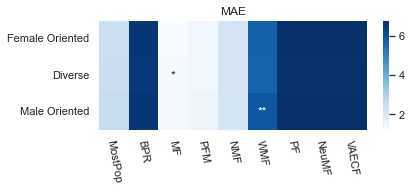

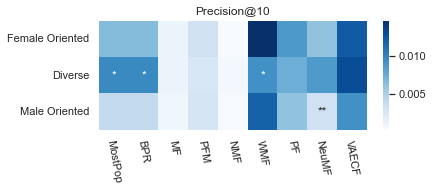

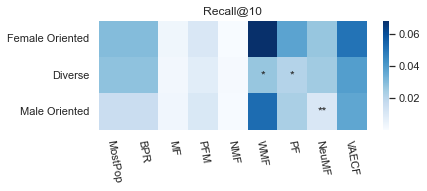

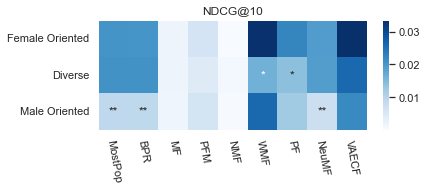

In [49]:
sns.set(rc = {'figure.figsize':(6,2)})

for metric in ['MAE', 'Precision@10', 'Recall@10', 'NDCG@10']:
    data = [[], [], []]
    labels = [['', '', '', '', '', '', '', '', ''], [], []]

    for item in metric_group_results[metric]:
        # print(item)
        data[0].append(item[0])
        data[1].append(item[1])
        data[2].append(item[2])


    for item in ttest_group_results[metric]:
        if item[0] < 0.005:
            labels[1].append('*')
        else:
            labels[1].append('')
        if item[1] < 0.005 and item[2] < 0.005:
            labels[2].append('**')
        else:
            labels[2].append('')

    fig, ax = plt.subplots()
    ax.set_title(metric)
    ax = sns.heatmap(data, annot=labels, fmt = '', cmap="Blues")
    ax.set_xticklabels(['MostPop', 'BPR', 'MF', 'PFM', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF'])
    ax.set_yticklabels(['Female Oriented', 'Diverse', 'Male Oriented'])
    ax.tick_params(axis='x', rotation=280)
    ax.tick_params(axis='y', rotation=0)
    #plt.savefig(f'{metric}_metric_analysis.pdf', dpi=300, bbox_inches='tight')